In [2]:
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Example Synthetic Data:

In [24]:
# Example Data
np.random.seed(33)
target = np.random.rand(500)
data = pd.DataFrame.from_dict({'target': target, 'indep': target * 2})
data

,target,indep
0,0.248510,0.497020
1,0.449975,0.899951
2,0.410941,0.821882
3,0.260300,0.520599
4,0.870396,1.740791
...,...,...
495,0.789180,1.578360
496,0.075926,0.151853
497,0.995801,1.991601
498,0.578444,1.156887


## Univariate Linear Regression

In [ ]:
class univariate_lr():
    def __init__(self, data, target_var, indep_var, learning_rate=1e-2, limit_iterations = 10000, tol=1e-5, seed=33):
        # Data
        self.data = data
        self.y = data[target_var]
        self.x = data[indep_var]
        
        # pred = m*x + n
        random.seed(seed)
        self.m = random.uniform(-1, 1)
        self.n = random.uniform(-1, 1)

        # Model training
        self.r = learning_rate
        self.limit_iter = limit_iterations
        self.tol = tol

    def __evaluate(self):
        # Prediction
        pred = [(self.m * x + self.n) for x in self.x]

        # L = MSE
        L = np.mean(
            [(yi - (self.m * xi + self.n) )**2 for yi,xi in zip(self.y, self.x)]
        )
        dL_dm = -2 * np.mean(
            [(yi - (self.m * xi + self.n) ) * xi for yi,xi in zip(self.y, self.x)]
        )
        dL_dn = -2 * np.mean(
            [(yi - (self.m * xi + self.n) ) for yi,xi in zip(self.y, self.x)]
        )

        return {
            'pred': pred,
            'L': L,
            'dL_dm': dL_dm,
            'dL_dn': dL_dn
        }

    def __update_coef(self, dL_dm, dL_dn, r):
        self.m -= r*dL_dm
        self.n -= r*dL_dn

    def train(self):
        self.loss = []
        for _ in range(self.limit_iter):
            results_dic = self.__evaluate()
            self.loss.append(results_dic['L'])

            self.__update_coef(dL_dm = results_dic['dL_dm'], 
                            dL_dn = results_dic['dL_dn'],
                            r = self.r)
            if results_dic['L'] < self.tol:
                print(results_dic['L'])
                break
        
        fig = plt.figure()
        plt.scatter(x=self.x, y=self.y)
        plt.scatter(x=self.x, y=results_dic['pred'])
        self.MSE = results_dic['L']

        fig = plt.figure()
        plt.scatter(x=np.arange(stop=len(self.loss)), y=self.loss)
        self.MSE = results_dic['L']
        

In [ ]:
model = univariate_lr(data=data, target_var='target', indep_var='indep')
model

9.990463346125497e-06


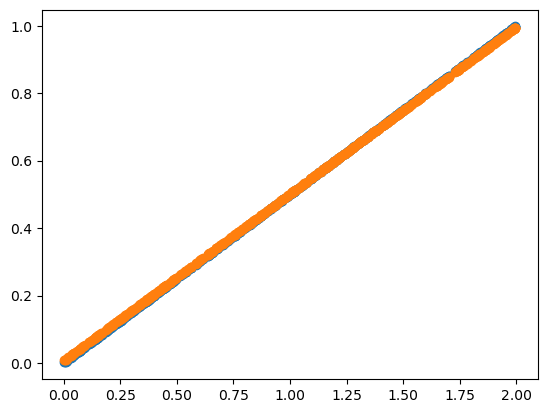

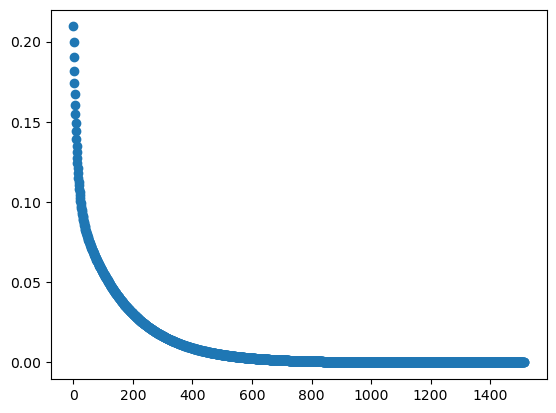

In [ ]:
model.train()


## General Regression Model
- Inherit most methods from a base model.
- Applicable to univariate and multivariate linear regression, polynomial regression, logistic regression. (maybe L1 and L2 regression too.)

In [ ]:
class base_regression_model():
    def __init__(self, data: pd.DataFrame, y_name: str, x_names, iter_limit=1000, tolerance=1e-3, learning_rate=1e-3, random_seed=33):
        # Data
        self.data = data
        
        # Formula: y = m·x + n * 1.0, where y, m, x and n are vectors 
        self.y = data.loc[:, y_name]
        self.x = data.loc[:, x_names]
        self.x['bias'] = 1.0 
        
        # Prediction and loss values initialization
        self.pred = np.repeat(0.0, repeats=len(self.y))
        self.loss = []

        # Additional parameters to control how training is performed
        self.iter_limit = iter_limit
        self.tol = tolerance
        self.seed = random_seed
        self.lr = learning_rate

    def _evaluate(self):
        pass
        # return (loss, {'x1': dL_dx1, ...})

    def _update(self, gradient: dict):
        # Update uses "-=" to advance in the direction of decreasing loss
        for col in self.coeff:
            self.coeff[col] -= self.lr * gradient[col]

    def predict(self, X: pd.DataFrame = None):
        '''
        Calculate the dot product of X with the coefficients. If X is not specified, then training data is used.
        '''
        if X is None:
            X = self.x

        return np.dot(
            X,
            np.array([self.coeff[col] for col in X.columns])
        )

    def train(self):
        '''
        Perform gradient descent iteratively to optimize coefficients.
        '''
        # Set random coefficients
        random.seed(self.seed)
        self.coeff = {
            x: random.uniform(-1.0, 1.0) for x in self.x
        }

        for _ in range(self.iter_limit):
            # Calculate prediction with current coefficients
            self.pred = self.predict()

            # The loss function and its gradient
            (loss, gradient) = self._evaluate()
            self.loss.append(loss)

            # Check if the loss function is under the tolerated error (stop if true)
            if loss < self.tol:
                break
            
            # Update the coefficients
            self._update(gradient)

    def summary(self):
        '''
        Statistical summary of the model.
        '''
        print('Model Summary')

        



In [ ]:
# Needs fixing yet

class univariate_lr(base_regression_model):
    def __init__(self, data, y_name, x_names, iter_limit=1000, tolerance=0.001, learning_rate=0.001, random_seed=33):
        super().__init__(data, y_name, x_names, iter_limit, tolerance, learning_rate, random_seed)

    def _evaluate(self):
        # error = y_real - y_pred
        error = self.y - self.pred

        loss = np.mean(error**2)
        
        # Gradient
        coeff = np.array([self.coeff[col] for col in self.x.columns])

        
        dL_dm = -2 * np.mean(
            [(yi - (self.m * xi + self.n) ) * xi for yi,xi in zip(self.y, self.x)]
        )
        dL_dn = -2 * np.mean(
            [(yi - (self.m * xi + self.n) ) for yi,xi in zip(self.y, self.x)]
        )

        return {
            'pred': pred,
            'L': L,
            'dL_dm': dL_dm,
            'dL_dn': dL_dn
        }

        return super()._evaluate()